# MATH 387 Lab Final Exam
### Haruki Moriguchi
### April 22, 2018
---

### Question 1

We first note that $f_a \in C^k([-1, 1])$ for any $k$ and for any $a > 0$, since $x^a$ and its derivatives are continuous everywhere, the zero function is continuous everywhere, and $\lim_{x \to 0^-}f_a^{(i)}(x) = \lim_{x \to 0^+} f_a^{(i)}(x) = 0$ for $i \in \{0, \dots, k\}$.

$f_a^{(k)}(x) = cx^{\beta}$, where $c$ is some constant and $\beta = a - k$. It is sufficient to consider only the interval $(0, 1]$, since $f_a^{(k)}([-1, 0]) = 0$, so
$$
    \sup_{-1\le x < y \le 0} \frac{|f_a^{(k)}(x) - f_a^{(k)}(y)|}{|x - y|^\alpha} = 0 < \infty \implies f_a^{(k)} \in C^{k, \alpha}([-1, 0])\ \forall k, \alpha
$$

For any $0 < l \le p < q \le 1$, we obtain the inequality
$$
    (p + q)^{1 - \beta}(p + q)^\beta = p + q = p^{1-\beta}p^\beta + q.
$$
Restricting $\beta \le 1$ and dividing by $(p + q)^{1 - \beta}$, we get
$$
    (p + q)^\beta = \left(\frac{p}{p+q}\right)^{1 - \beta}p^\beta + \frac{q}{(p+q)^{1 - \beta}} \le p^\beta + \frac{q}{(2l)^{1 - \beta}}
$$

Now let $x = p$ and $y = p + q$ and restrict $\alpha \le \beta$, yielding
$$
    y^\beta \le x^\beta + \frac{y - x}{(2l)^{1-\beta}} \implies |cx^\beta - cy^\beta| \le \frac{|c||x - y|}{(2l)^{1-\beta}} \implies \frac{|cx^\beta - cy^\beta|}{|x - y|^\alpha} \le \frac{|c||x - y|^{1 - \alpha}}{(2l)^{1-\beta}} < \infty.
$$

Thus,
$$
    \sup_{0 < x < y \le 1} \frac{|f_a^{(k)}(x) - f_a^{(k)}(y)|}{|x - y|^\alpha} = \sup_{0 < x < y \le 1} \frac{|cx^\beta - cy^\beta|}{|x - y|^\alpha} < \infty
$$
so $f_a \in C^{k, \alpha}([-1, 1])$ for $\alpha \le a - k \le 1$ (since we restricted $\alpha \le \beta \le 1$). Thus, $k + \alpha \le a$.

We must have $\alpha \le \beta$, since if $\alpha > \beta$ and we choose $y = Cx$ for some $C > 0$ such that $Cx \le 1$, we obtain
$$
    \sup_{0 < x < y \le 1} \frac{|f_a^{(k)}(x) - f_a^{(k)}(y)|}{|x - y|^\alpha} \ge \sup_{0 < x \le 1} \frac{|c||x^\beta - Cx^\beta|}{|x - Cx|^\alpha} = |c||1-C|^{\beta-\alpha} \sup_{0 < x \le 1} x^{\beta - \alpha} = \infty
$$

---

### Question 2

In [1]:
import numpy as np
from numpy import linalg as la
import scipy.special as sp
import matplotlib.pyplot as plt

In [2]:
# Implementation of f_a. Accepts a number or an array of numbers as input.
def f(a):
    g = lambda x: x**a if x > 0 else 0
    return lambda x: g(x) if isinstance(x, (int, long, float, complex)) else np.array([g(i) for i in x])

In [3]:
# Approximate a function using piecewise constant function on the uniform partition of [-1, 1] consisting of n subintervls.
# We use the value of f at the midpoint of each subinterval.
def pw_const_appx(n):
    xs = np.linspace(-1, 1, n + 1)
    return lambda f: (xs, np.insert(f(((np.insert(xs, 0, 0) + np.append(xs, 0))/2.)[1:-1]), 0, 0))

We plot a couple of illustrative examples with different values of $a$ and $n$.

In [4]:
# Drawing functions so we can also use them later

def draw_f(f, plt):
    x = np.linspace(-1, 1, 150)
    plt.plot(x, f(x), 'k', label='exact', zorder=0)

def draw_appx(a_s, n_s, g, appx_type, style='default'):
    fig = plt.figure(figsize=(20, 20))
    for index, a in enumerate(a_s):
        ax = fig.add_subplot(2, 2, index+1)
        draw_f(f(a), ax)
        for n in n_s:
            (x, y) = g(n)(f(a))
            ax.plot(x, y, drawstyle=style, label=r'$n$ = {0} approximation'.format(n), zorder=n)
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$y$')
        ax.set_title(r'Approximation of $f_a$ Using {0} for Various $n$, where a = {1}'.format(appx_type, a))
        ax.legend(prop={'size': 16})
    plt.show()

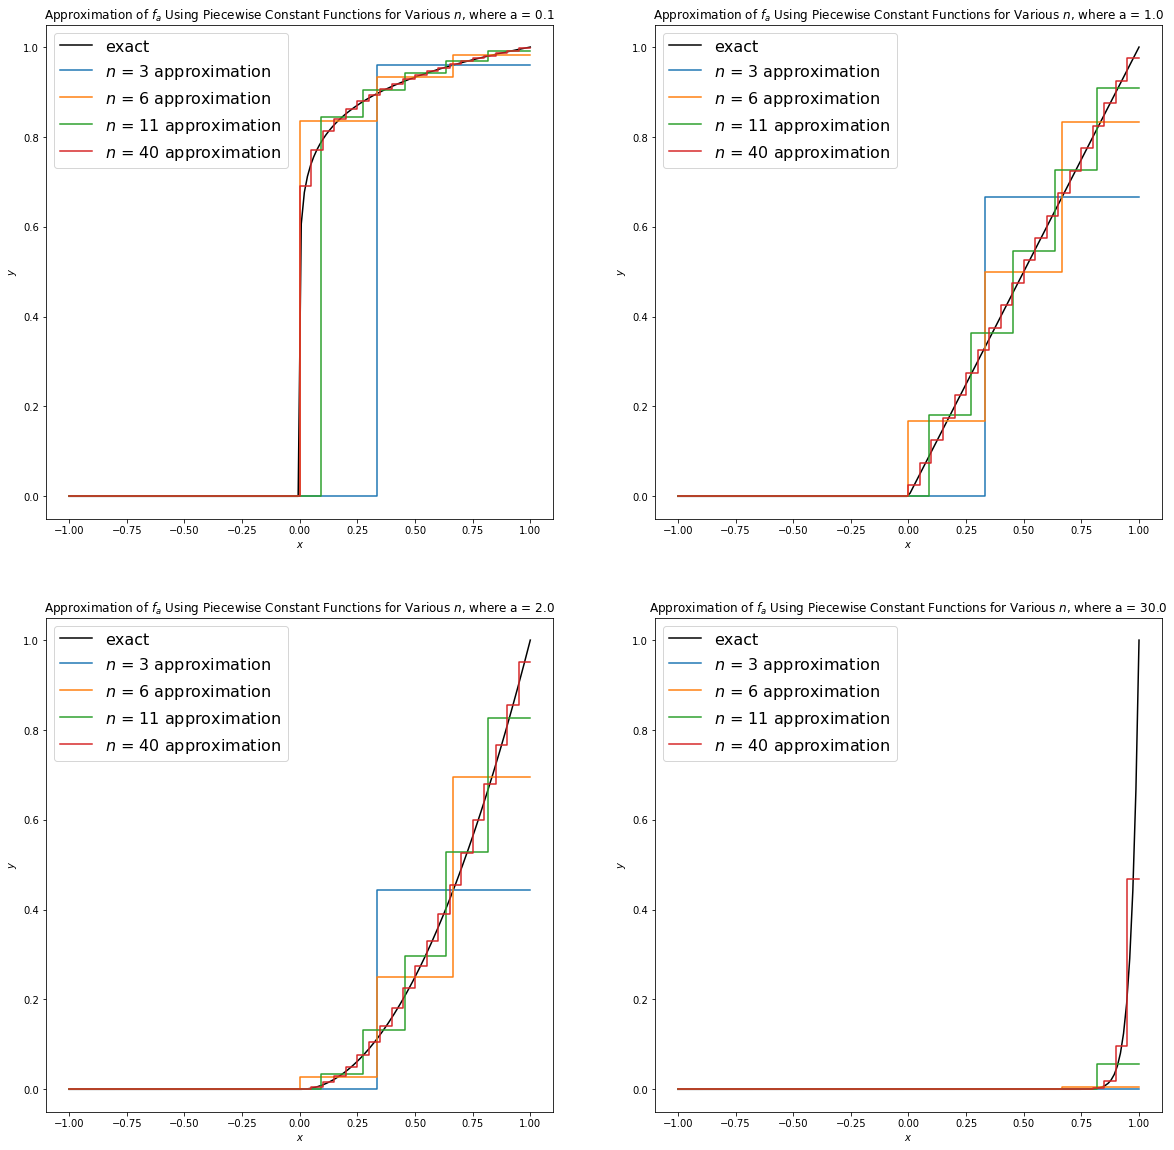

In [5]:
a_s = np.array([0.1, 1., 2., 30])
draw_appx(a_s, np.array([3, 6, 11, 40]), pw_const_appx, 'Piecewise Constant Functions', 'steps-pre')

To approximate the error of approximation for piecewise constant functions, we first partition the interval $[-1, 1]$ into $t$ nodes, where $t$ is sufficiently large (we put 2000 nodes in the code). For each node $x_i$, we determine which of the $n$ subintervals it falls into in the approximation. Let $g_i$ be the value at that interval. We create an array of $f_a(x_i) - g_i$ for all $i \in \{1, \dots, t\}$, and we output the maximum.

In [57]:
# Approximately compute the error of the approximation in the maximum norm for piecewise constant function
def pw_const_err_appx(a_s, n):
    x_s = np.linspace(-1, 1, 2000)
    def err(a):
        (x, y) = pw_const_appx(n)(f(a))
        return la.norm(f(a)(x_s) - y[np.searchsorted(x, x_s)], np.inf)
    return lambda f: np.array([err(a) for a in a_s])

Let $\tilde{f}_a$ be an approximation function. Then, if $E = ||f_a - \tilde{f}_a||_\infty$,
$$
    E = n^{-r} \iff r = -\log_n(E) \iff r = -\frac{\log(E)}{\log(n)}
$$

In [7]:
def rate_of_conv(x, n):
    return -np.log(x)/np.log(n)

Now we plot the approximation of the error of the approximation function against $n$ to determine when $n$ is sufficiently large to calculate the asymptotic value of the rate of convergence.

In [8]:
# Function to draw the error of approximation against n
def draw_err(err_func, a_s, n_s, err_type, func=lambda x: x):
    err = np.transpose(np.array([err_func(a_s, n)(func) for n in n_s]))
    plt.figure(figsize=(10, 5))
    for index, a in enumerate(a_s):
        plt.plot(n_s, err[index], label=r'$a$ = {0}'.format(a))        
    plt.xlabel(r'$n$')
    plt.ylabel(r'error')
    plt.title(r'{0}: Error of Appx Against $n$ for Various $a$'.format(err_type))
    plt.legend()
    plt.show()

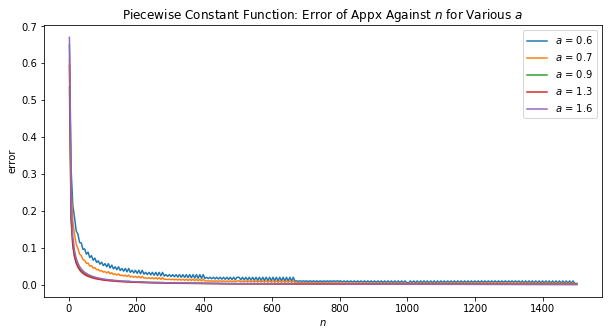

In [51]:
draw_err(pw_const_err_appx, np.array([0.6, 0.7, 0.9, 1.3, 1.6]), np.linspace(2, 1500, 300, dtype='int'), 'Piecewise Constant Function')

From the plot and given that we only used $2000$ points to approximate the error, we determine that $n = 1500$ is large enough.

In [10]:
# Function to draw the rate of convergence graph against a
def draw_roc(err_func, a_s, n, err_type, func=lambda x: x):
    plt.figure(figsize=(10, 5))
    plt.plot(a_s, rate_of_conv(err_func(a_s, n)(func), n), 'o-')
    plt.xlabel(r'$a$')
    plt.ylabel(r'$r$')
    plt.title(r'{0}: Rate of Convergence $r$ Against $a$ for $n$ = {1}'.format(err_type, n))
    plt.show()

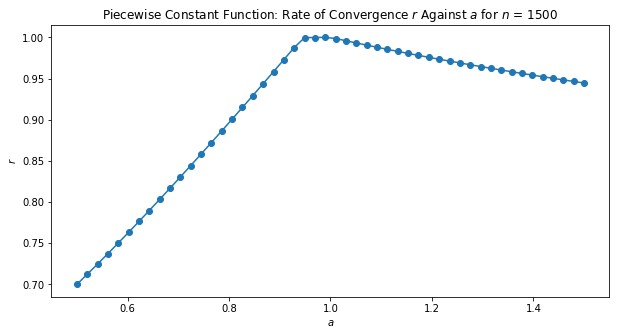

In [41]:
draw_roc(pw_const_err_appx, np.linspace(0.5, 1.5), 1500, 'Piecewise Constant Function')

If we focus around $a=1$, we approximate $r$ to be
$$
    r \approx \begin{cases} 0.67a + 0.37 & a \lesssim 1 \\ -0.13a + 1.13 & otherwise \end{cases}
$$
For $a \lesssim 1$, $f_a$ is not differentiable at $x=0$, and it increases abruptly at $x = 0$, yielding a low rate of convergence. The rate of convergence peaks at $a \approx 1$ and then steadly decreases. This is due to $f_a$ becoming more and more like a vertical line at $x = 1$ as $a$ increases, so the rate of convergence is the best when $f_a$ is farthest from having a vertical line. This is the case for approximating $f_a$ with piecewise constant functions, since if $f_a$ increases a lot within one subinterval (one step), the error is large and thus the rate of convergence is low.

We also note that for each of the $n$ subintervals, if $m_i$ is the midpoint of each interval, then we approximate $f_a$ within $\left(m_i - \frac{1}{2n}, m_i + \frac{1}{2n}\right)$. Thus, by Taylor's expansion of $f_a$ at each interval, we obtain
$$
    |f_a(x) - \tilde{f_a}(x)| \le \frac{f_a'(m_i)}{n} + O\left(\frac{1}{n^2}\right) = O(n^{-1}),
$$
so the rate of convergence is at most $r = 1$, which occurs when $f'_a$ is constant (the method we are using to approximate $f_a$), so at $a = 1$.

---

### Question 3

In [52]:
# Approximate f by a continuous piecewise linear function on the uniform partition of [-1, 1] of n subintervals
def pw_linear_appx(n):
    x = np.linspace(-1, 1, n + 1)
    return lambda f: (x, f(x))

We plot a couple of illustrative examples with different values of $a$ and $n$.

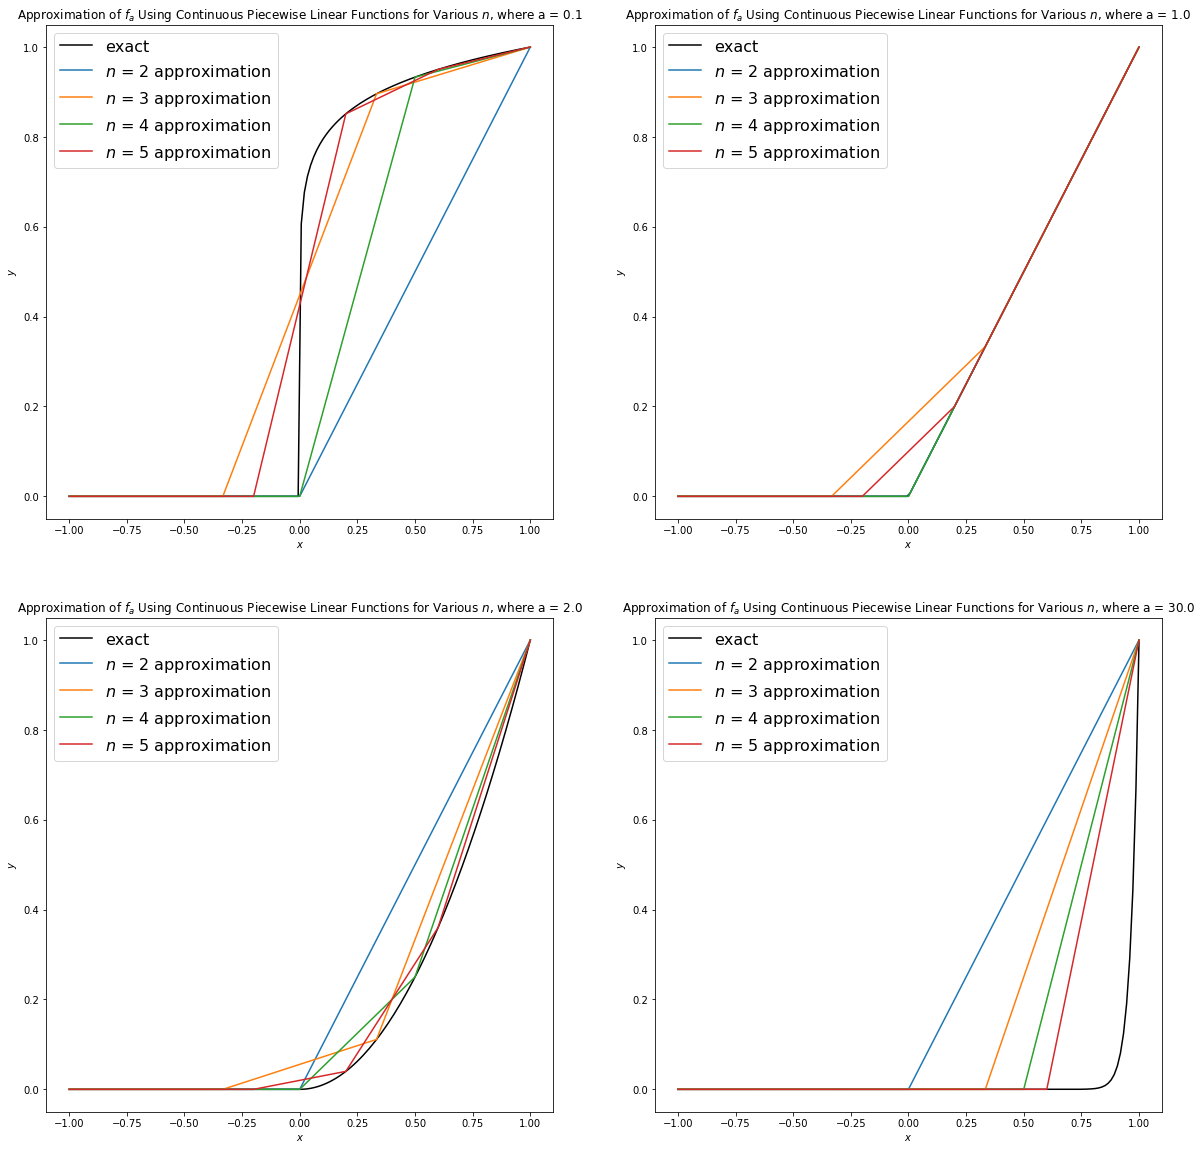

In [13]:
draw_appx(np.array([0.1, 1., 2., 30]), np.array([2, 3, 4, 5]), pw_linear_appx, 'Continuous Piecewise Linear Functions')

To approximate the error of approximation for piecewise linear functions ($n$ subintervals, each with line equation $y_j(x)$), we first partition the interval $[-1, 1]$ into $t$ nodes, where $t$ is sufficiently large (we put 2000 nodes in the code). For each node $x_i$, we determine which of the $n$ subintervals it falls into in the approximation. We figure out the equation of the line $y_j$ at that subinterval and calculate $g_i = y_j(x_i - x_i')$, where $x_i'$ is the closest benchmark value of the approximation that contains $x_i$ in its subinterval. We then create an array of $f_a(x_i) - g_i$ for all $i \in \{1, \dots, t\}$, and we output the maximum.

In [14]:
# Approximately compute the error of the approximation in the maximum norm for piecewise linear function
def pw_lin_err_appx(a_s, n):
    x_s = np.linspace(-1, 1, 2000)
    def err(a):
        (x, y) = pw_linear_appx(n)(f(a))
        i = np.insert(np.searchsorted(x, x_s[1:]) - 1, 0, 0)
        (x_i, y_i) = (x[i], y[i])
        return la.norm(f(a)(x_s) - (y_i + (y[i+1] - y_i)/(x[i+1] - x_i)*(x_s - x_i)), np.inf)
    return lambda f: np.array([err(a) for a in a_s])

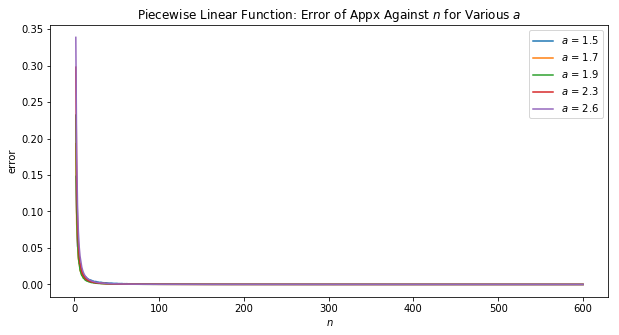

In [15]:
draw_err(pw_lin_err_appx, np.array([1.5, 1.7, 1.9, 2.3, 2.6]), np.linspace(2, 600, 500, dtype='int'), 'Piecewise Linear Function')

From the plot, we determine that $n = 1000$ is large enough to graph our rate of convergence.

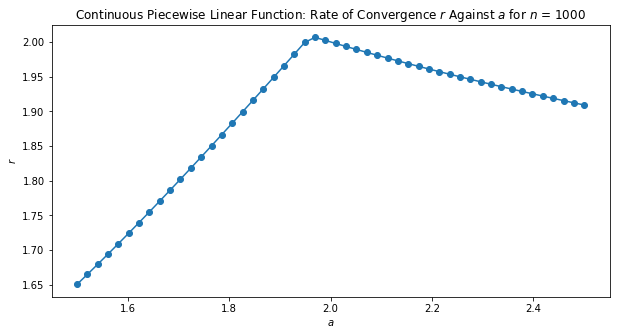

In [36]:
draw_roc(pw_lin_err_appx, np.linspace(1.5, 2.5), 1000, 'Continuous Piecewise Linear Function')

Focusing around $a \approx 2$, we approximate $r$ to be
$$
    r \approx \begin{cases} 0.74a + 0.53 & a \lesssim 2 \\ -0.19a + 2.38 & otherwise \end{cases}
$$
This result is different than approximating $f_a$ using piecewise constant functions as the rate of convergence is greater when approximating with piecewise linear functions.
When calculating the error approximation, we approximated $f_a$ by $n$ subintervals by lines, so if $x_i$'s are the endpoints of the subintervals, then
$$
    \tilde{f}_a(x) = \frac{f_a(x_i + n^{-1}) - f_a(x_i)}{n^{-1}}(x - x_i) + f_a(x_i) \approx f_a'(x)(x - x_i) + f_a(x_i), \qquad \forall x - x_i \le n^{-1}
$$
($x_i$ is the closest benchmark value that contains $x$ in its subinterval). Thus, by Taylor's expansion of $f_a$ at each $x_i$, we obtain
$$
    |f_a(x) - \tilde{f}_a(x)| = O(n^{-2}),
$$
so the rate of convergence is at most $r = 2$, which occurs when $f_a'$ is linear, so at $a = 2$.

---

### Question 4

To compute the Bernstein polynomial of degree $n$ for $f_a$ on $[-1, 1]$, we scale the polynomial by using the formula
$$
    B_nf(x) = \sum_{j = 0}^n f\left(\frac {2j} n - 1\right) \binom j n \left(\frac{x+1}{2}\right)^j \left(1-\frac{x+1}{2}\right)^{n-j}, \qquad x \in [-1, 1].
$$
For the sake of implementation, however, we can compute using
$$
    B_n'f(x) = \sum_{j = 0}^n f\left(\frac {2j} n - 1\right) \binom j n x^j \left(1-x\right)^{n-j}, \qquad x \in [0, 1].
$$
and then plot $(2x-1, B_n'f(x))$ for $x \in [0, 1]$.

In [17]:
# Approximate f with a Bernstein polynomial of degree n scaled to [-1, 1]
def bernstein_poly_appx(n):
    x_s = np.linspace(0, 1, 500)
    j = np.arange(n + 1.)
    return lambda f: (2*x_s - 1, np.array([np.add.reduce(f(2*j/n - 1)*sp.binom(n, j)*x**j*(1 - x)**(n - j)) for x in x_s]))

We plot a couple of illustrative examples with different values of $a$ and $n$.

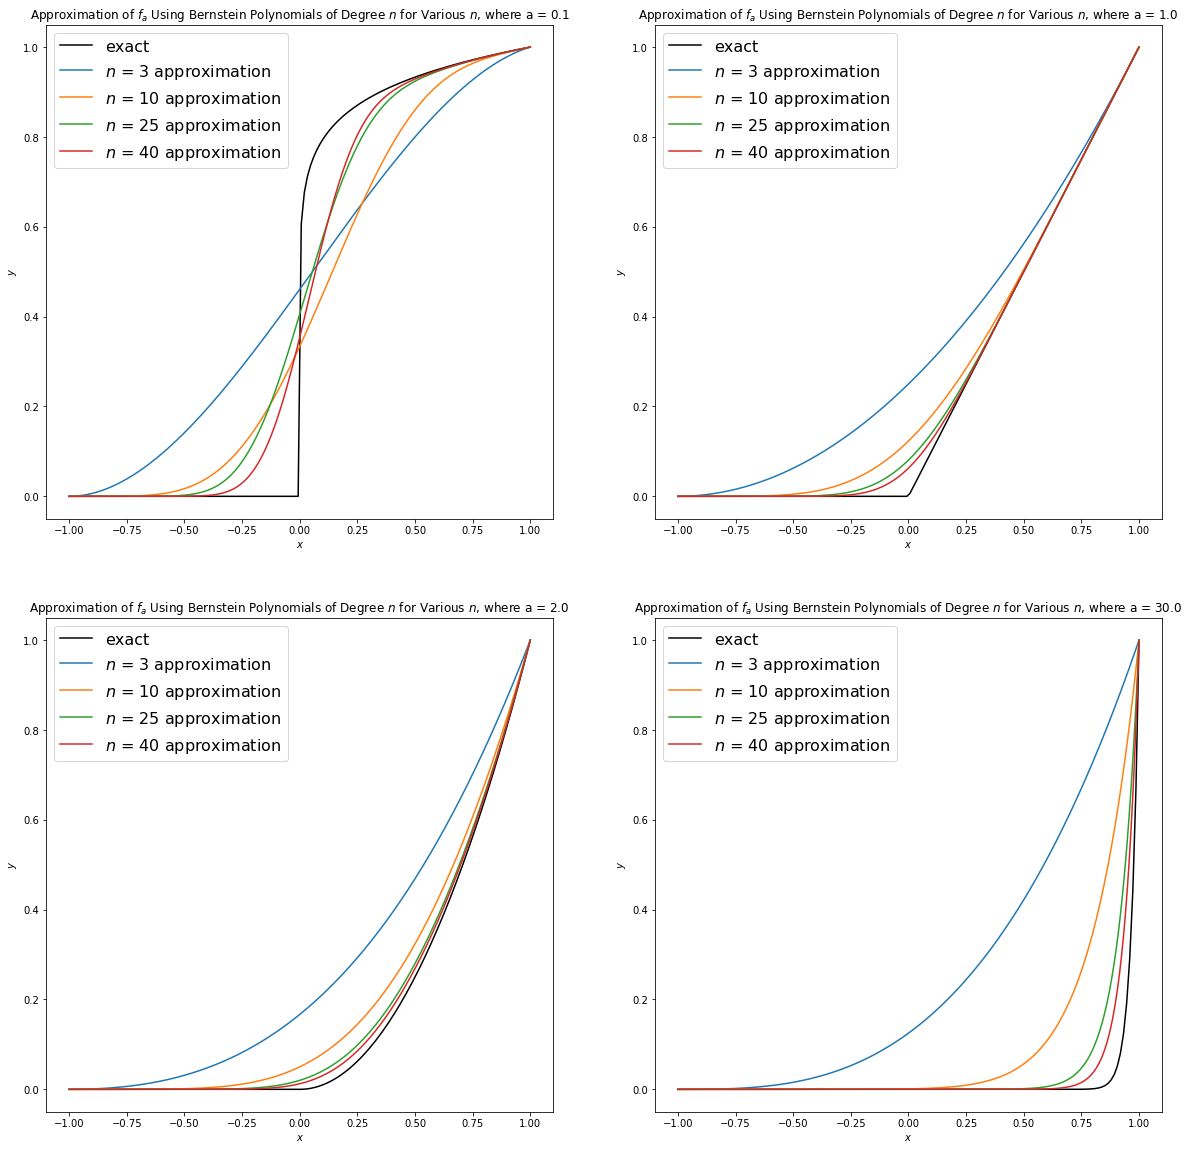

In [18]:
draw_appx(np.array([0.1, 1., 2., 30]), np.array([3, 10, 25, 40]), bernstein_poly_appx, r'Bernstein Polynomials of Degree $n$')

Approximating the error for polynomials is easy, as we already calculate their values for some $t$ (sufficienty large) values. For each value $x_i$, we create an array of $f_a(x_i) - \tilde{f}_a(x_i)$ and find the maximum.

In [19]:
# Approximately compute the error of the approximation in the maximum norm for polynomials
def poly_err_appx(a_s, n):
    def err(g, a):
        (x, y) = g(n)(f(a))
        return la.norm(f(a)(x) - y, np.inf)
    return lambda g: np.array([err(g, a) for a in a_s])

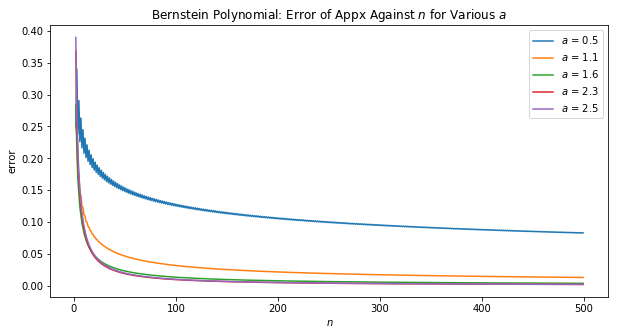

In [20]:
draw_err(poly_err_appx, np.array([0.5, 1.1, 1.6, 2.3, 2.5]), np.arange(2, 500), 'Bernstein Polynomial', bernstein_poly_appx)

From the plot (and considering our CPU speed), we determine that $n = 250$ is large enough to plot the rate of convergence.

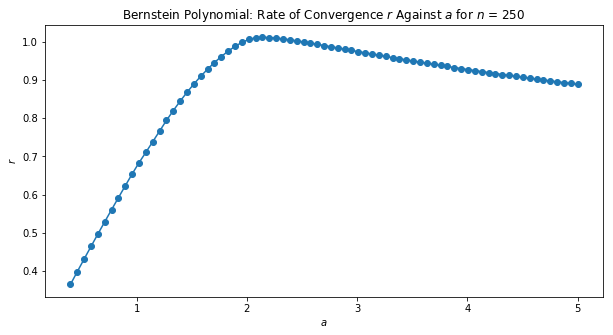

In [54]:
draw_roc(poly_err_appx, np.linspace(0.4, 5, 75), 250, 'Bernstein Polynomial', bernstein_poly_appx)

From the plot, we approximate $r$ to be
$$
    r \approx \begin{cases} 0.4a + 0.2 & a \lesssim 2 \\ -0.05a + 1.09 & otherwise \end{cases}
$$

Comparing to our previous methods, approximating $f_a$ using a Bernstein polynomial yields a peak at $r = 1$ when $a \approx 2$. We derived in class that for any function $f\in C^{0, 1}$, $E_n(f) = ||f(x) - B_nf(x)|| \le \frac{9}{4} \omega\left(n^{-0.5}\right)$, where $\omega$ is the modulus of continuity, and then as a remark, $E_n(f) \lesssim n^{-\alpha/2}$ for $f \in C^{0, \alpha}$. Thus for $a \lesssim 2$, since $f_a \in C^{k, \alpha}$ and $k + \alpha \le a$, we obtain $E_n(f) \lesssim n^{-1} \implies r \le 1$. The convergence rate peaks at $a = 2$, since for $a \ge 2$, $k > 0$, and we get a smaller $\alpha$ value.

---

### Question 5

We approximate $f_a$ on $[-1, 1]$ with a Chebyshev polynomial of degree $n$ by using the formula
$$
    p(x) = \left[ \sum_{k = 0}^n c_kT_k(x)\right] - \frac 1 2 c_0,
$$
where 
$$
    c_j = \frac{2}{n+1} \sum_{k=1}^{n+1} f\left[\cos\left(\frac{\pi(k - \frac 1 2)}{n + 1}\right)\right]\cos\left(\frac{\pi j(k - \frac 1 2)}{n+1} \right), \qquad j \in \{0, \dots, n\}
$$
and
$$
    T_j(x) = \cos(j \arccos x), \qquad j \in \{0, \dots, n\}.
$$

In [22]:
# Return array of coefficients c_0, ..., c_n for function f
def c_j(n):
    j = np.arange(n + 1.) # [0, ..., n]
    frac = np.pi*(j + 0.5)/(n + 1.)
    return lambda f: 2./(n + 1.) * np.array([np.add.reduce(f(np.cos(frac))*np.cos(frac*i)) for i in j])

# Approximate f using a Chebyshev interpolation polynomial of degree n on [-1, 1]
def chebyshev_poly_appx(n):
    x_s = np.linspace(-1, 1, 500)
    def p(f):
        c = c_j(n)(f) # [c_0, ..., c_n]
        c_0 = 0.5*c[0]
        return np.array([np.add.reduce(c*np.cos(np.arange(n + 1.)*np.arccos(x))) - c_0 for x in x_s])
    return lambda f: (x_s, p(f))

We plot a couple of illustrative examples with different values of $a$ and $n$.

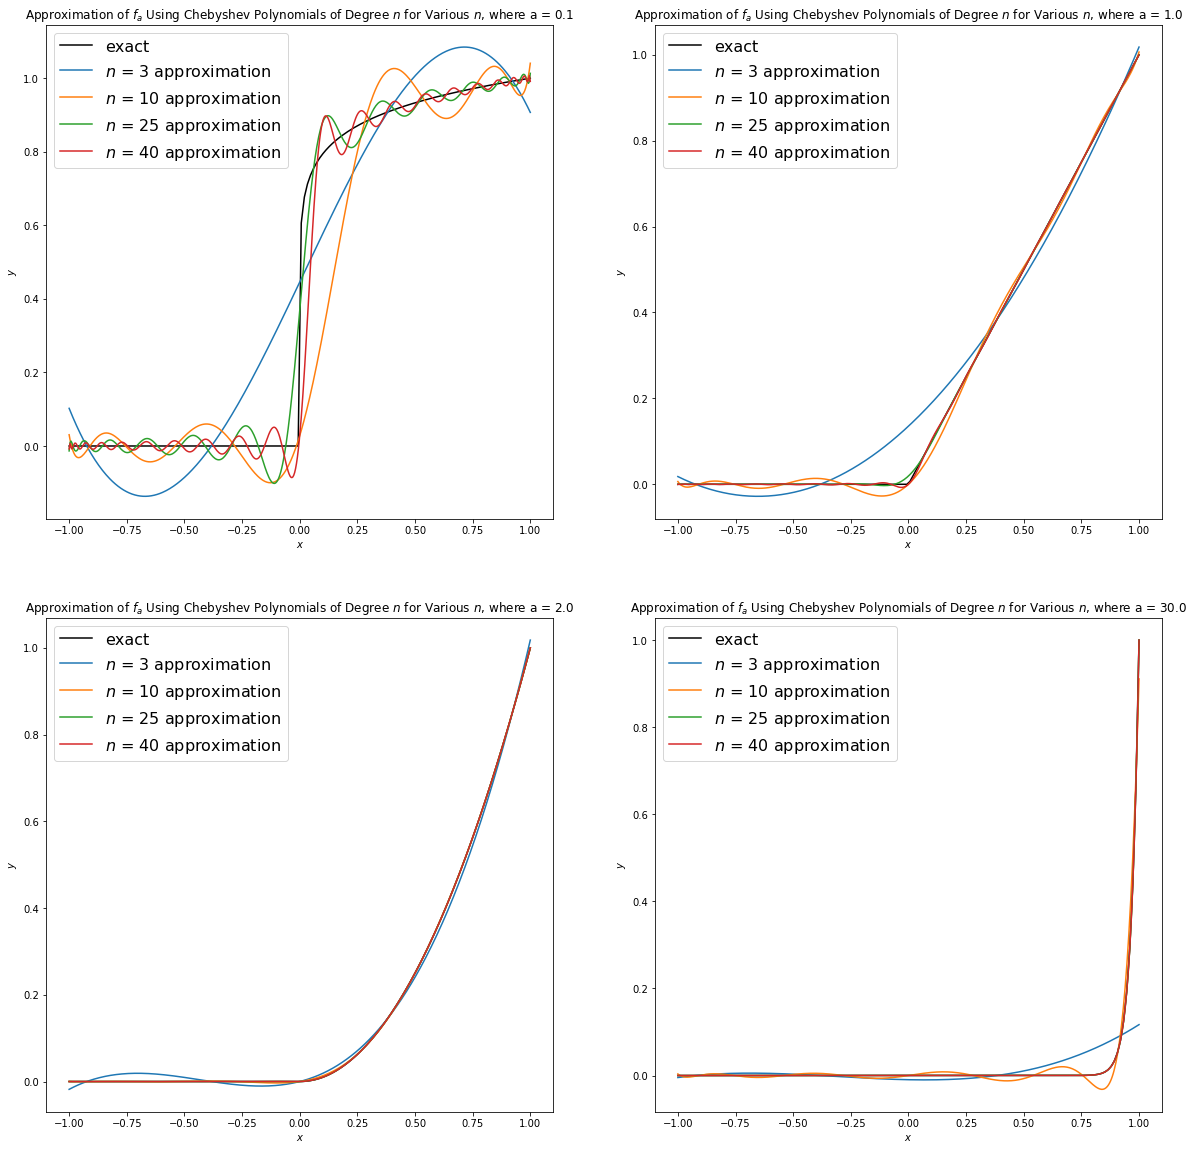

In [23]:
draw_appx(a_s, np.array([3, 10, 25, 40]), chebyshev_poly_appx, r'Chebyshev Polynomials of Degree $n$')

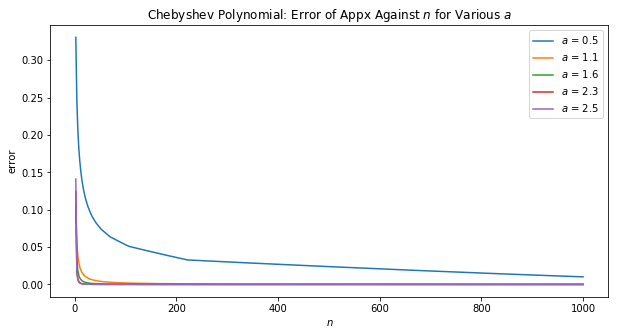

In [56]:
draw_err(poly_err_appx, np.array([0.5, 1.1, 1.6, 2.3, 2.5]), np.linspace(2, 1000, 500, dtype='int'), 'Chebyshev Polynomial', chebyshev_poly_appx)

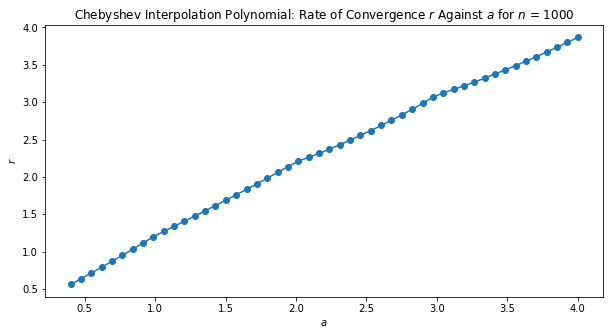

In [53]:
draw_roc(poly_err_appx, np.linspace(0.4, 4), 1000, 'Chebyshev Interpolation Polynomial', chebyshev_poly_appx)

From the plot, we approximate $r$ to be
$$
    r \approx 0.92a + 0.28
$$

 In class, we stated from Jackson's theorem that $||f - L_nf|| \le C\frac{\log n}{n^{k + 2}}$ for $f \in C^{k, \alpha}$, where $L_nf$ is the Lagrange interpolation with Chebyshev nodes. Thus, the rate of convergence increases (linearly) as $a$ increases, since $k$ increases linearly as $a$ increases.